# Supervised Challenge

Your assignment is both a classification task as well as a regression task.

We will first import the relevant data and then describe the individual challenges.

In [1]:
%matplotlib inline
import os

import numpy as np
import pandas as pd
import csv
import graphviz
from graphviz import Source

In [2]:
import os

# Download the data from our GitLab page
!wget https://gitlab.com/CBDS/kennisgebied_ai/-/raw/master/data/kwb-2018-toelichting.csv
!wget https://gitlab.com/CBDS/kennisgebied_ai/-/raw/master/data/kwb-2018.csv

data_directory = os.path.join('/content/')

--2023-11-21 10:22:40--  https://gitlab.com/CBDS/kennisgebied_ai/-/raw/master/data/kwb-2018-toelichting.csv
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3375 (3.3K) [text/plain]
Saving to: ‘kwb-2018-toelichting.csv’

kwb-2018-toelichtin 100%[===================>]   3.30K  --.-KB/s    in 0s      

2023-11-21 10:22:40 (51.1 MB/s) - ‘kwb-2018-toelichting.csv’ saved [3375/3375]

--2023-11-21 10:22:40--  https://gitlab.com/CBDS/kennisgebied_ai/-/raw/master/data/kwb-2018.csv
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3774153 (3.6M) [text/plain]
Saving to: ‘kwb-2018.csv’

kwb-2018.csv        100%[===================>]   3.60M  --.-KB/s    in 0.08s   

2023-11-2

In [3]:
column_reference_table = {}
with open(os.path.join(data_directory, "kwb-2018-toelichting.csv")) as file:
    reader = csv.reader(file, delimiter=';')
    for row in reader:
        column_reference_table[row[0]] = row[1]

In [4]:
with open(os.path.join(data_directory, "kwb-2018.csv"), encoding='latin1') as file:
    data = pd.read_csv(file, sep =';')
print(f"The available features:\t {list(data)}")

The available features:	 ['gwb_code_10', 'gwb_code_8', 'regio', 'gm_naam', 'recs', 'gwb_code', 'ind_wbi', 'a_inw', 'a_man', 'a_vrouw', 'a_00_14', 'a_15_24', 'a_25_44', 'a_45_64', 'a_65_oo', 'a_ongeh', 'a_gehuwd', 'a_gesch', 'a_verwed', 'a_w_all', 'a_nw_all', 'a_marok', 'a_antaru', 'a_suri', 'a_tur', 'a_ov_nw', 'a_hh', 'a_1p_hh', 'a_hh_z_k', 'a_hh_m_k', 'g_hhgro', 'bev_dich', 'a_woning', 'g_woz', 'p_1gezw', 'p_mgezw', 'p_bewndw', 'p_leegsw', 'p_koopw', 'p_huurw', 'p_wcorpw', 'p_ov_hw', 'p_e_o_w', 'p_bjj2k', 'p_bjo2k', 'a_pau', 'a_bst_b', 'a_bst_nb', 'g_pau_hh', 'g_pau_km', 'a_m2w', 'a_opp_ha', 'a_lan_ha', 'a_wat_ha', 'ste_mvs', 'ste_oad']


In [5]:
column_reference_table['a_pau']  # use these descriptions to try and determine the parameter being asked.

"Personenauto's totaal"

In [6]:
data['recs'].unique()

array(['Land', 'Gemeente', 'Wijk', 'Buurt'], dtype=object)

In [7]:
selected_region_type = 'Gemeente'

In [8]:
data_for_selected_region_type = data[data.recs == selected_region_type]
data_for_selected_region_type.shape

(380, 56)

-----------------

### Classification challenge

Learn a model that predicts [ste_mvs], the degree of urbanisation.

#### ste_mvs: Mate van stedelijkheid

Op grond van de omgevingsadressendichtheid is aan iedere buurt, wijk of gemeente een stedelijkheidsklasse toegekend. De volgende klassenindeling is gehanteerd:

1: zeer sterk stedelijk >= 2 500 adressen per km²

2: sterk stedelijk 1 500 - 2 500 adressen per km²

3: matig stedelijk 1 000 - 1 500 adressen per km²

4: weinig stedelijk 500 - 1 000 adressen per km²

5: niet stedelijk < 500 adressen per km²

In [9]:
feature_names = ['a_hh', 'a_opp_ha'] #first select some features

In [10]:
X = data_for_selected_region_type[feature_names]
X.head(5)

a_hh  a_opp_ha
1     5540      2458
9     4391      4496
19    2980      4573
34   11617     22750
64  122541     10150

In [11]:
y_real = data_for_selected_region_type[['ste_mvs']]
y_real['ste_mvs'].value_counts()

4    135
3     78
5     74
2     74
1     19
Name: ste_mvs, dtype: int64

In [12]:
target_names = y_real.sort_values(by=['ste_mvs'])['ste_mvs'].unique()
target_names

array(['1', '2', '3', '4', '5'], dtype=object)

In [13]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

decision_tree = tree.DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 20)
decision_tree.fit(X, y_real)

y_pred = decision_tree.predict(X)

print(f"Your model scores: {accuracy_score(y_real, y_pred)}")

Your model scores: 0.6157894736842106


### Design features that allows you to classify stedelijkheid as best as you can!

Try using different features, compute new features or use different classification algorithm.

In [14]:
# a_opp_ha is totale oppervlakte in hele hectaren.
# een km2 is 100 hectaren
# data: inwoners, huishoudens
# 1: zeer sterk stedelijk >= 2 500 adressen per km²
# 2: sterk stedelijk 1 500 - 2 500 adressen per km²
# 3: matig stedelijk 1 000 - 1 500 adressen per km²
# 4: weinig stedelijk 500 - 1 000 adressen per km²
# 5: niet stedelijk < 500 adressen per km²

data_for_selected_region_type['a_hh_p_km2'] = data_for_selected_region_type['a_hh'] / (data_for_selected_region_type['a_opp_ha']/100)
data_for_selected_region_type[['a_hh_p_km2','a_hh','a_opp_ha']].head(5)

<ipython-input-14-edc8a0b3cd1d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_selected_region_type['a_hh_p_km2'] = data_for_selected_region_type['a_hh'] / (data_for_selected_region_type['a_opp_ha']/100)


a_hh_p_km2    a_hh  a_opp_ha
1    225.386493    5540      2458
9     97.664591    4391      4496
19    65.165099    2980      4573
34    51.063736   11617     22750
64  1207.300493  122541     10150

Your model scores: 0.6605263157894737


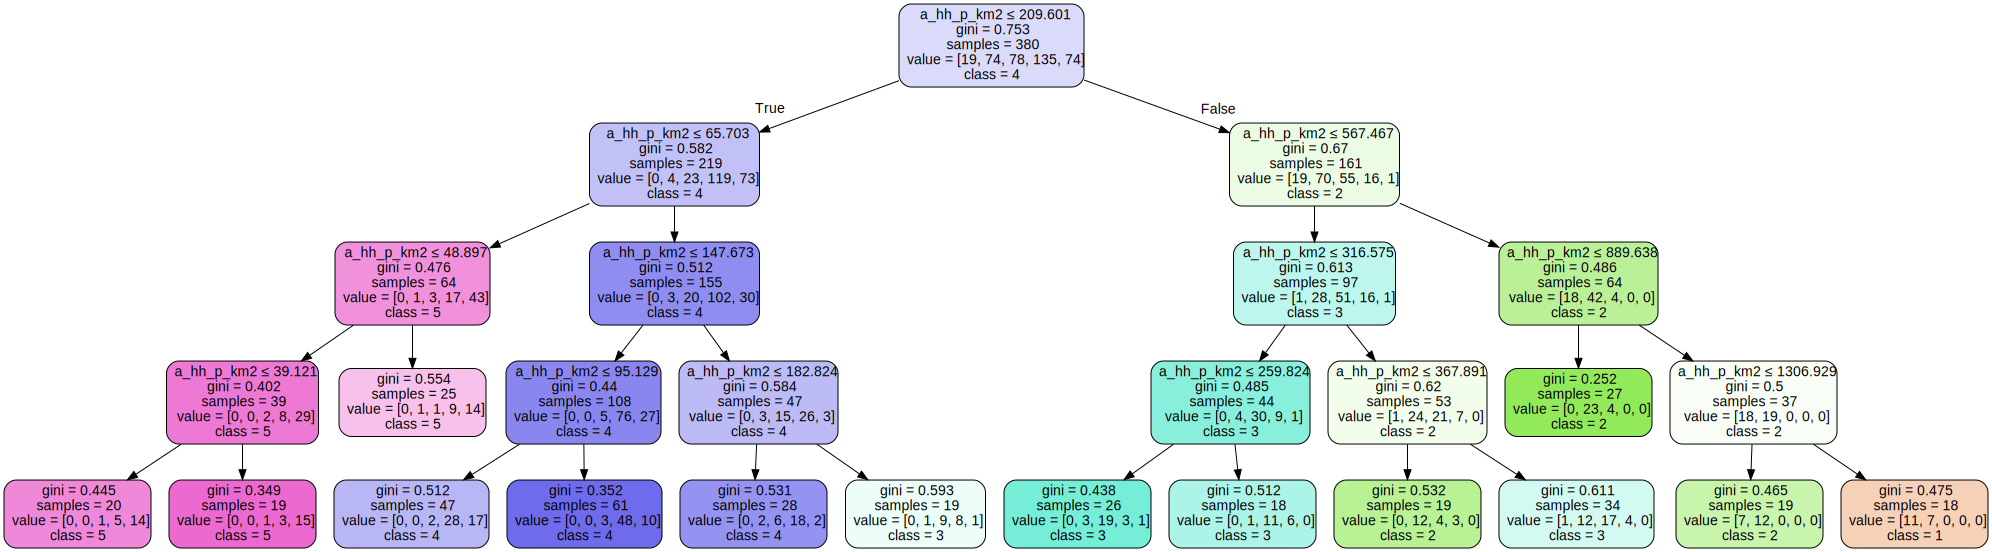

In [15]:
# all in one cell
feature_names = ['a_hh_p_km2']
X = data_for_selected_region_type[feature_names]

decision_tree = tree.DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 18)
decision_tree.fit(X, y_real)

y_pred = decision_tree.predict(X)

print(f"Your model scores: {accuracy_score(y_real, y_pred)}")

dot_data = tree.export_graphviz(decision_tree, out_file=None,
                      feature_names=feature_names,
                      class_names=target_names,
                      filled=True, rounded=True,
                      special_characters=True)

graph = graphviz.Source(dot_data)
graph

-----------------

### Regression challenge

Learn a model that predicts [a_pau], the number of cars. Beware, this is a real number now, not a class. This is a regression problem!


The city of The Hague and Heerlen expects that the number of inhabitants will increase with 10% in the next 5 years.
What will be the impact on the number of cars in the city? This is important information when planning public infrastructure.

